# Module 0 - Downloading the required data from WaPOR portal

This notebook downloads the essential data for calculating Blue Evapotranspiration (ETb) from the WaPOR Portal.

 The following data are being downloaded:

*   Land cover classification map
*   Precipitation
*   Actual Evapotranspiration
*   Gross Biomass Water Productivity







# Import Libraries and Modules

Mount to the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the required libraries

In [ ]:
!pip install rasterio
!pip install geopandas
!pip install rioxarray
!pip install pyshp
!pip install gdal

 Import the modules

In [ ]:
import os
import sys
from time import sleep
import gc
from pathlib import Path
from rasterio.plot import show
from rasterio.features import shapes
import multiprocessing
from tqdm import tqdm
import shapefile
import warnings
from shapely.geometry import mapping

#Import local modules

* Get WaPOR API Token from your WaPOR portal account and paste it in the box runnuing with the below code.  

Link: https://wapor.apps.fao.org/profile
![title](https://github.com/wateraccounting/WAPORWP/blob/master/Notebooks/img/Fig0.gif?raw=true)

In [ ]:
import shapefile
import matplotlib.pyplot as plt
import sys

sys.path.insert(0,'/content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Modules')     ## Path to Local moduls

import WaPOR
from osgeo import gdal

Obtained saved API Token
Your WaPOR API Token is saved into: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Modules/WaPOR/wapor_api_token.pickle. 
 If you wish to change your API Token, please delete this file


## 2. Read the spatial extend of study area

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
## Raplace the path below with the path of your study area shapefile
roi_shapefile=r"/content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data/1Boundary/Shapefile/LEBMASKD.shp"
shape=shapefile.Reader(roi_shapefile)
xmin,ymin,xmax,ymax=shape.bbox
print('Extent of study area: lonlim = [{0},{2}], latlim = [{1},{3}]'.format(xmin,ymin,xmax,ymax))

Extent of study area: lonlim = [35.11458206692914,36.6255], latlim = [33.05506206204379,34.685019999999994]


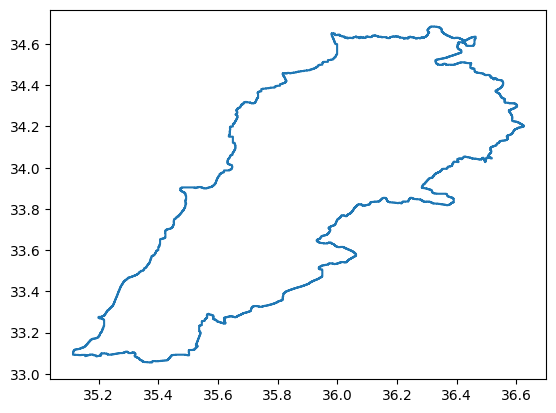

In [ ]:
## Plot to check shapefile
plt.figure()
sf=shape
for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y)
plt.show()

##3. Download WaPOR data for the study area extent


* Specify the output directory to save the dowloaded data

In [ ]:
output_dir=r'/content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data'


* Enter the start and end date of the data you want to download

In [ ]:
startdate ='2015-01-01'
enddate ='2020-12-31'

##Land cover classification (Annual)

In [ ]:
WaPOR.download_yearly(output_dir,
                       data='LCC',
                       Startdate = startdate,
                       Enddate = enddate,
                       latlim=[ymin-0.001, ymax+0.001],
                       lonlim=[xmin-0.001, xmax+0.001],
                       level=1,
                       )


Download WaPOR Level 1 yearly LCC data for the period 2015-01-01 till 2020-12-31
Loading WaPOR catalog from cached file: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_LCC_A'

##Precipitation (Monthly)

In [ ]:
WaPOR.download_monthly(output_dir,
                       data='PCP',
                       Startdate = startdate,
                       Enddate = enddate,
                       latlim=[ymin-0.05, ymax+0.05],
                       lonlim=[xmin-0.05, xmax+0.05],
                       level=1,
                       )

##Actual evapotranspiration & interception (Monthly)

In [ ]:
WaPOR.download_monthly(output_dir,
                       data='AETI',
                       Startdate = startdate,
                       Enddate = enddate,
                       latlim=[ymin-0.001, ymax+0.001],
                       lonlim=[xmin-0.001, xmax+0.001],
                       level=1,
                       )

##Gross Biomass Water Productivity

In [ ]:
WaPOR.download_yearly(output_dir,
                       data='GBWP',
                       Startdate = startdate,
                       Enddate = enddate,
                       latlim=[ymin-0.001, ymax+0.001],
                       lonlim=[xmin-0.001, xmax+0.001],
                       level=1,
                       )


Download WaPOR Level 1 yearly GBWP data for the period 2015-01-01 till 2020-12-31
Loading WaPOR catalog from cached file: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_GBWP_A'

Continue with the next Module . .